In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('better_life_index_data_corrected.csv')
data1 = data[['GDP_per_capita','life_satisfaction']]
data1


,GDP_per_capita,life_satisfaction
0,63000,7.0
1,45000,7.5
2,47000,7.1
3,42000,6.9
4,41000,6.8
...,...,...
95,800,4.7
96,1000,3.9
97,5000,4.2
98,1300,5.6


Text(0, 0.5, 'Life_satisfaction')

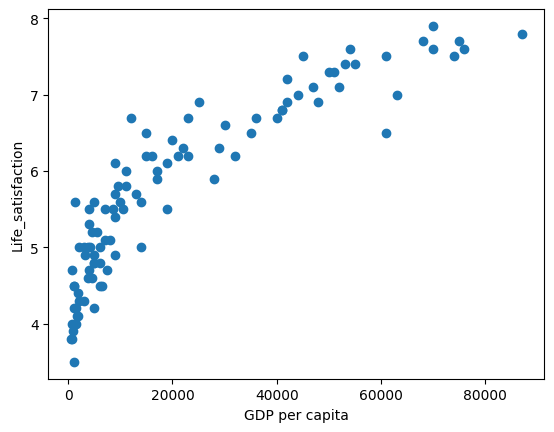

In [3]:
X = data['GDP_per_capita']
Y = data['life_satisfaction']
plt.scatter(X,Y)
plt.xlabel('GDP per capita')
plt.ylabel('Life_satisfaction')

In [7]:
## correlation
data1.corr()

,GDP_per_capita,life_satisfaction
GDP_per_capita,1.000000,0.887319
life_satisfaction,0.887319,1.000000


In [9]:
## start linear regression 
## divide the independent and dependent features
X = data1[['GDP_per_capita']]
Y = data1['life_satisfaction'] ## dependent

In [10]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=50)

In [12]:
X_train


,GDP_per_capita
14,10000
21,55000
12,6000
58,3700
82,50000
...,...
94,2000
33,25000
11,10500
96,1000


In [13]:
## standerizaion with independent
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression


In [18]:
regression = LinearRegression()

In [19]:
regression.fit(X_train,Y_train)

LinearRegression()

In [20]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [1.12261171]
Intercept: 5.674666666666666


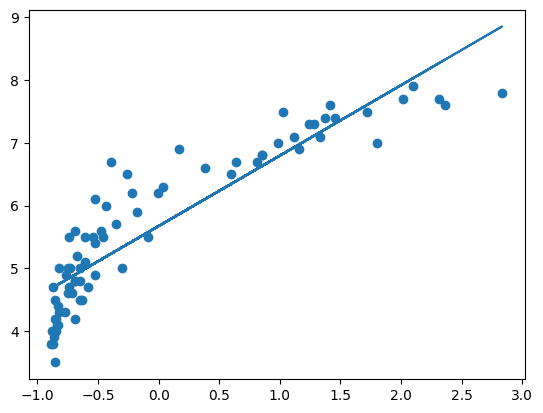

In [21]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [22]:
y_pred = regression.predict(X_test)
y_pred

array([8.22785688, 8.03469191, 5.47525603, 5.18550857, 5.62012976,
       5.57183851, 6.05475094, 4.84746987, 4.87161549, 4.89576111,
       5.08892608, 7.60007072, 4.79917862, 5.76500349, 5.04063484,
       6.6825371 , 5.76500349, 6.0064597 , 6.19962467, 6.6825371 ,
       5.3303823 , 4.71225439, 5.1130717 , 5.37867354, 4.71708351])

In [23]:
## r2 score

from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.489825634157558


In [39]:
## apply polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train_poly,Y_train)
y_pred = regression_1.predict(X_test_poly)


In [41]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.6641567697491086


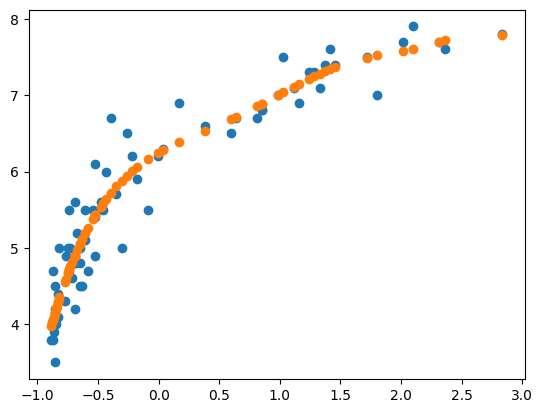

In [42]:
plt.scatter(X_train,Y_train)
plt.scatter(X_train,y_pred)

In [46]:
new_GDP = np.array([[35000]])
new_GDP_transform = poly.transform(new_GDP)
new_GDP_transform

array([[1.00000000e+00, 3.50000000e+04, 1.22500000e+09, 4.28750000e+13,
        1.50062500e+18, 5.25218750e+22, 1.83826562e+27, 6.43392969e+31,
        2.25187539e+36]])

In [47]:
## predicting 35000
print(regression_1.predict(new_GDP_transform))

[-3.59600351e+34]
